In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/sleep-cycle-and-productivity/sleep_cycle_productivity.csv')

In [3]:
data.shape

(5000, 15)

In [4]:
data.head(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [5]:
data.isnull().sum()

Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64

In [6]:
data.dtypes

Date                              object
Person_ID                          int64
Age                                int64
Gender                            object
Sleep Start Time                 float64
Sleep End Time                   float64
Total Sleep Hours                float64
Sleep Quality                      int64
Exercise (mins/day)                int64
Caffeine Intake (mg)               int64
Screen Time Before Bed (mins)      int64
Work Hours (hrs/day)             float64
Productivity Score                 int64
Mood Score                         int64
Stress Level                       int64
dtype: object

<Axes: title={'center': 'Productivity Score'}, xlabel='Productivity Score'>

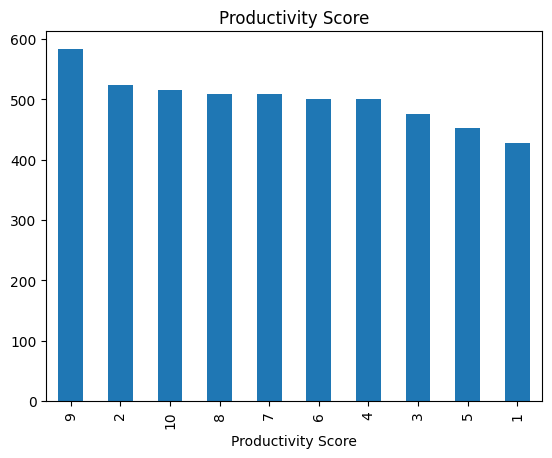

In [7]:
data['Productivity Score'].value_counts().plot(kind='bar', title='Productivity Score')

<Axes: title={'center': 'Mood Score'}, xlabel='Mood Score'>

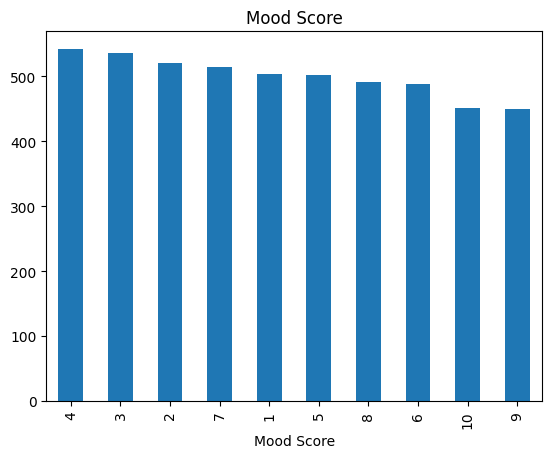

In [8]:
data['Mood Score'].value_counts().plot(kind='bar', title='Mood Score')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Exercise (mins/day)', ylabel='Stress Level'>

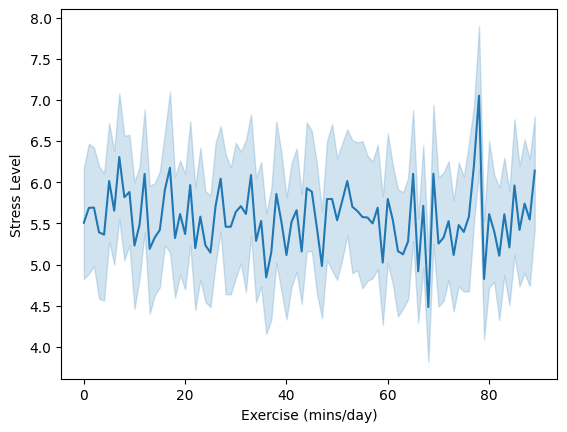

In [9]:
sns.lineplot(data=data, x='Exercise (mins/day)', y='Stress Level')

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

# Create additional features
data['Sleep_Duration'] = data['Sleep End Time'] - data['Sleep Start Time']
data['Sleep_Duration'] = data['Sleep_Duration'].apply(lambda x: x + 24 if x < 0 else x)

In [11]:
data.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Sleep_Duration
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6,5.28
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7,5.41
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10,5.35
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2,7.55
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9,6.75


In [12]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [13]:
features = ['Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 
           'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 
           'Work Hours (hrs/day)', 'Stress Level']

target = 'Productivity Score'

# Prepare X and y
X = data[features]
y = data[target]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#scaler = StandardScaler()
#data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 7)
Testing set shape: (1000, 7)


In [16]:
#models = LinearRegression()